<a href="https://colab.research.google.com/github/FZsara/neural-network-lab/blob/main/NN1st_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Packages

In [ ]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob
import librosa.display
import random
from sklearn.metrics import accuracy_score

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from keras.utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

import os

# Load np array X and y

In [ ]:
# Dataset for lab examination

#X=np.load('Give data location')
#y=np.load('Give data location')

# Data Set 1

X=np.load('/content/drive/MyDrive/nn/cough_X_features_np.npy')
y=np.load('/content/drive/MyDrive/nn/cough_y_features_np.npy')

# Data Set 2

X=np.load('/content/drive/MyDrive/nn/cough_X_features_np.npy')
y=np.load('/content/drive/MyDrive/nn/cough_y_features_np.npy')
# Data Set 3

X=np.load('/content/drive/MyDrive/nn/cough_X_features_np.npy')
y=np.load('/content/drive/MyDrive/nn/cough_y_features_np.npy')
label_to_id = {v:i for i,v in enumerate(np.unique(y))}
id_to_label = {v: k for k, v in label_to_id.items()}
y = np.array([label_to_id[x] for x in y])

In [ ]:
# Checking our shapes
X.shape
print(X.shape)
print(X)

(491, 193)
[[ 0.7774016  -0.05425863 -0.35144269 ... -0.45218576 -0.4370232
  -0.01711512]
 [ 0.1183541   1.53359858  1.24225704 ... -2.63982721  2.47782474
  -1.15077773]
 [-0.53119257 -0.28284258  1.12038083 ...  0.34872249  0.55396523
  -0.16494817]
 ...
 [-0.20516431 -0.85620505  0.49701437 ...  0.42735503 -0.82097128
  -0.06913244]
 [-5.96008284 -0.36423584  1.28397571 ... -0.18995576  0.10417283
   0.35501649]
 [ 0.83925686 -0.8045509  -0.27055277 ... -2.00814413 -2.31079533
  -0.94496466]]


In [ ]:
# Checking our shapes
print(y.shape)
print(Counter(y))
print(y)

(491,)
Counter({1: 350, 0: 141})
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

# Cross Validation Packages

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import StratifiedKFold, KFold,StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.kernel_approximation import RBFSampler

from sklearn.pipeline import Pipeline

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import ComplementNB,BernoulliNB
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn import metrics
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Grid Search for Hyper-Parameters Estimation

In [ ]:
# grid search class weights with svm for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# generate dataset

# define model

model = MLPClassifier(max_iter=10)

#define grid

param_grid = {
    'hidden_layer_sizes': [(64,64),(128,64),(512,),(32,32),(8,8,8)],
    'activation': ['identity','tanh', 'logistic', 'relu'],
    'learning_rate': ['invscaling','constant','adaptive'],
    'learning_rate_init': [0.0001, 0.001,0.01]
}

# define evaluation procedure

cv = StratifiedKFold(n_splits=10)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.810776 using {'activation': 'tanh', 'hidden_layer_sizes': (128, 64), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01}
0.611279 (0.142956) with: {'activation': 'identity', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0001}
0.741605 (0.112014) with: {'activation': 'identity', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001}
0.780789 (0.102488) with: {'activation': 'identity', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01}
0.549918 (0.071966) with: {'activation': 'identity', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
0.763959 (0.105527) with: {'activation': 'identity', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.001}
0.779156 (0.099566) with: {'activation': 'identity', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


# Cross Validation(Train+Test)

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(hidden_layer_sizes=(128,64),activation= 'relu',learning_rate='adaptive', learning_rate_init=0.01, max_iter=10) # Include parameter based on grid search output
#model = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0,class_weight="balanced",)
#model = RandomForestClassifier(class_weight= 'balanced_subsample', criterion= 'entropy', max_features= 'log2', n_estimators= 600)
#model = SVC(kernel="linear", C=0.025,class_weight="balanced",)


#cv = LeaveOneOut()
#cv = KFold(n_splits=10)
cv = StratifiedKFold(n_splits=10)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

#print(scores.mean())

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[0.82       0.87755102 0.87755102 0.65306122 0.79591837 0.81632653
 0.73469388 0.75510204 0.83673469 0.67346939]
Accuracy: 0.784 (0.074)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[[ 75  66]
 [ 35 315]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Total Data
(491, 193)
Cross Validation split
(441, 193)
(50, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[12  3]
 [ 6 29]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[12  2]
 [ 4 31]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[12  2]
 [ 4 31]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 7  7]
 [ 5 30]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[10  4]
 [ 8 27]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 7  7]
 [ 2 33]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 3 11]
 [ 3 32]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 6  8]
 [ 1 34]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 7  7]
 [ 3 32]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 4 10]
 [ 5 30]]
Mean Confusion Matrix
[[ 8.   6.1]
 [ 4.1 30.9]]


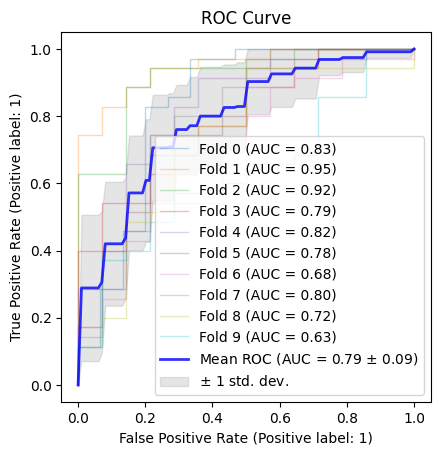

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(hidden_layer_sizes=(128,64),activation= 'relu',learning_rate='adaptive', learning_rate_init=0.01, max_iter=10) # Include parameter based on grid search output
#model = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0,class_weight="balanced",)
#model = RandomForestClassifier(class_weight= 'balanced_subsample', criterion= 'entropy', max_features= 'log2', n_estimators= 600)
#model = SVC(kernel="linear", C=0.025,class_weight="balanced",)

#cv = LeaveOneOut()
#cv = KFold(n_splits=10)
cv = StratifiedKFold(n_splits=10)

conf_matrix_list_of_arrays = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   print('Total Data')
   print(X.shape)
   print('Cross Validation split')
   print(X_train.shape)
   print(X_test.shape)

   model.fit(X_train, y_train)
   conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   print(conf_matrix)
   conf_matrix_list_of_arrays.append(conf_matrix)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = RocCurveDisplay.from_estimator(model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print('Mean Confusion Matrix')
print(mean_of_conf_matrix_arrays)

#print(conf_mat)

# SMOTE Syn`tati`c Minority Oversampling T

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Checking  shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

counter=Counter(y_train)
print(counter)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'relu',learning_rate='invscaling', learning_rate_init=0.001, max_iter=10) # Include parameter based on grid search output
model.fit(X_train, y_train)
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print(conf_matrix)

(392, 193)
(99, 193)
(392,)
(99,)
Counter({1: 279, 0: 113})
Counter({1: 71, 0: 28})
Counter({1: 279, 0: 113})
Counter({1: 279, 0: 279})
[[17 11]
 [10 61]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Checking the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Printing class distribution before under-sampling
print("Class distribution before under-sampling:", Counter(y_train))

# Applying under-sampling
undersample = RandomUnderSampler()
X_train, y_train = undersample.fit_resample(X_train, y_train)

# Checking class distribution after under-sampling
print("Class distribution after under-sampling:", Counter(y_train))

# Training the model
model = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', learning_rate='invscaling',
                      learning_rate_init=0.001, max_iter=10) # Include parameters based on grid search output
model.fit(X_train, y_train)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)


(392, 193)
(99, 193)
(392,)
(99,)
Class distribution before under-sampling: Counter({1: 279, 0: 113})
Class distribution after under-sampling: Counter({0: 113, 1: 113})
Confusion Matrix:
 [[23  5]
 [29 42]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 126})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 8.6  5.5]
 [ 4.8 30.2]]
Accuracy: 0.790 (0.055)


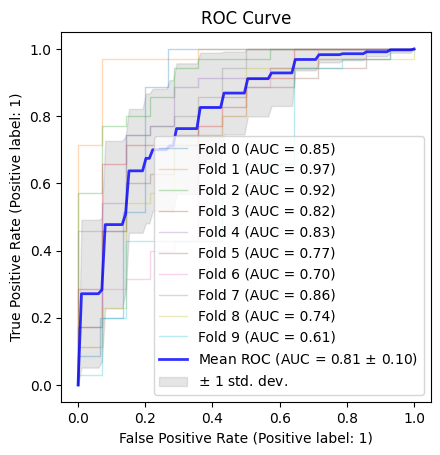

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'relu',learning_rate='invscaling', learning_rate_init=0.001, max_iter=10) # Include parameter based on grid search output

#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)

conf_matrix_list_of_arrays = []
accuracy_scores=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   counter=Counter(y_train)
   print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   print(counter)

   model.fit(X_train, y_train)
   conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   #print(conf_matrix)
   conf_matrix_list_of_arrays .append(conf_matrix)
   acc_score=accuracy_score(y_test, model.predict(X_test))
   accuracy_scores.append(acc_score)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = RocCurveDisplay.from_estimator(model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

#conf_matrix=np.add(conf_matrix_list_of_arrays,axis=0)
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
#print(conf_matrix)
print(mean_of_conf_matrix_arrays)
mean_accuracy_scores=np.mean(accuracy_scores, axis=0)
#print(mean_accuracy_scores)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))

#print(conf_mat)

# 10-fold stratified cross-validation with Random Under-Sampling to handle class imbalance

Class distribution before under-sampling: Counter({1: 315, 0: 126})
Class distribution after under-sampling: Counter({0: 126, 1: 126})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Class distribution before under-sampling: Counter({1: 315, 0: 127})
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Confusion Matrix:
 [[ 9.4  4.7]
 [ 9.7 25.3]]
Accuracy: 0.707 (0.070)


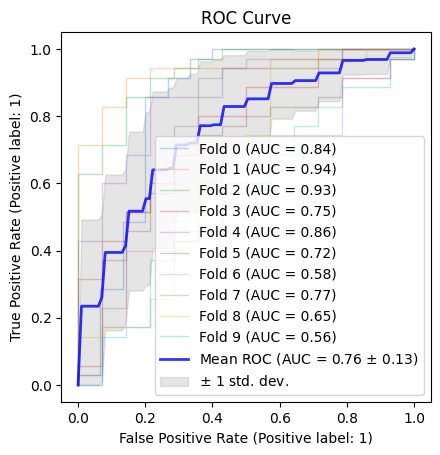

In [ ]:
from numpy import mean, std
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, RocCurveDisplay, auc
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

model = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', learning_rate='invscaling',
                      learning_rate_init=0.001, max_iter=10)  # Include parameters based on grid search output

cv = StratifiedKFold(n_splits=10)
conf_matrix_list_of_arrays = []
accuracy_scores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Print the initial class distribution
    print("Class distribution before under-sampling:", Counter(y_train))

    # Apply under-sampling
    undersample = RandomUnderSampler()
    X_train, y_train = undersample.fit_resample(X_train, y_train)

    # Print the class distribution after under-sampling
    print("Class distribution after under-sampling:", Counter(y_train))

    # Train the model
    model.fit(X_train, y_train)

    # Get the confusion matrix and accuracy score
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    conf_matrix_list_of_arrays.append(conf_matrix)
    acc_score = accuracy_score(y_test, model.predict(X_test))
    accuracy_scores.append(acc_score)

    # Plot ROC curve for each fold
    viz = RocCurveDisplay.from_estimator(model, X_test, y_test,
                                         name='Fold {}'.format(i),
                                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# Plot mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# Plot standard deviation around the mean ROC
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve")
ax.legend(loc="lower right")
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve_UnderSampling.jpg')

# Calculate mean confusion matrix and accuracy
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
mean_accuracy_scores = np.mean(accuracy_scores)
std_accuracy_scores = np.std(accuracy_scores)

print("Mean Confusion Matrix:\n", mean_of_conf_matrix_arrays)
print("Accuracy: %.3f (%.3f)" % (mean_accuracy_scores, std_accuracy_scores))


# trains an MLPClassifier on imbalanced data

In [ ]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Checking  shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# fit a model

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='adaptive',max_iter=10) # Include parameter based on grid search output

model.fit(X_train, y_train)
# predict probabilities
y_pred = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = y_pred[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
#thresholds = arange(0, 1, 0.1)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
#scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.4f, AUC-Score=%.4f' % (thresholds[ix], scores[ix]))
conf_mat = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
print(conf_mat)
acc_score=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
print('Accuracy=%.4f' %acc_score)
auc_score = roc_auc_score(y_test, to_labels(probs, thresholds[ix]))
print('AUC Score=%.4f' %auc_score)
print(classification_report(y_test, to_labels(probs, thresholds[ix]),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

(392, 193)
(99, 193)
(392,)
(99,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.2340, AUC-Score=0.8805
[[10 18]
 [ 1 70]]
Accuracy=0.8081
AUC Score=0.6715
              precision    recall  f1-score   support

           0       0.91      0.36      0.51        28
           1       0.80      0.99      0.88        71

    accuracy                           0.81        99
   macro avg       0.85      0.67      0.70        99
weighted avg       0.83      0.81      0.78        99



# SMOTE to balance the dataset, trains an MLPClassifier

In [ ]:
from numpy import arange, argmax
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Print shapes of the splits
print("Train/Test shapes:")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Apply SMOTE to balance the training data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Checking class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train))

# Apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# Define and fit the model
model = MLPClassifier(hidden_layer_sizes=(512,), activation='tanh', learning_rate='adaptive', max_iter=10)
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred = model.predict_proba(X_test)
probs = y_pred[:, 1]  # Keep probabilities for the positive class

# Define a range of thresholds
thresholds = arange(0, 1, 0.001)

# Evaluate F1 score for each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

# Find the best threshold based on F1 score
ix = argmax(scores)
best_threshold = thresholds[ix]
print('Best Threshold=%.4f, Best F1-Score=%.4f' % (best_threshold, scores[ix]))

# Evaluate model with the best threshold
y_pred_labels = to_labels(probs, best_threshold)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_mat)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred_labels)
print('Accuracy=%.4f' % acc_score)

# AUC Score
auc_score = roc_auc_score(y_test, y_pred_labels)
print('AUC Score=%.4f' % auc_score)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_labels, digits=2))


Train/Test shapes:
(392, 193) (99, 193)
(392,) (99,)
Class distribution after SMOTE: Counter({1: 279, 0: 279})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Threshold=0.2440, Best F1-Score=0.8652
Confusion Matrix:
 [[19  9]
 [10 61]]
Accuracy=0.8081
AUC Score=0.7689
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.87      0.86      0.87        71

    accuracy                           0.81        99
   macro avg       0.76      0.77      0.77        99
weighted avg       0.81      0.81      0.81        99



# balances training data using SMOTE

# balances training data using RandomUnderSampler

In [ ]:
from numpy import arange, argmax
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score, classification_report
from collections import Counter

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Print shapes of the splits
print("Train/Test shapes:")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Apply RandomUnderSampler to balance the training data
undersample = RandomUnderSampler()
X_train, y_train = undersample.fit_resample(X_train, y_train)

# Checking class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_train))

# Apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# Define and fit the model
model = MLPClassifier(hidden_layer_sizes=(512,), activation='tanh', learning_rate='adaptive', max_iter=10)
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred = model.predict_proba(X_test)
probs = y_pred[:, 1]  # Keep probabilities for the positive class

# Define a range of thresholds
thresholds = arange(0, 1, 0.001)

# Evaluate F1 score for each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

# Find the best threshold based on F1 score
ix = argmax(scores)
best_threshold = thresholds[ix]
print('Best Threshold=%.4f, Best F1-Score=%.4f' % (best_threshold, scores[ix]))

# Evaluate model with the best threshold
y_pred_labels = to_labels(probs, best_threshold)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_mat)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred_labels)
print('Accuracy=%.4f' % acc_score)

# AUC Score
auc_score = roc_auc_score(y_test, y_pred_labels)
print('AUC Score=%.4f' % auc_score)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_labels, digits=2))


Train/Test shapes:
(392, 193) (99, 193)
(392,) (99,)
Class distribution after undersampling: Counter({0: 113, 1: 113})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Threshold=0.1150, Best F1-Score=0.9020
Confusion Matrix:
 [[15 13]
 [ 2 69]]
Accuracy=0.8485
AUC Score=0.7538
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        28
           1       0.84      0.97      0.90        71

    accuracy                           0.85        99
   macro avg       0.86      0.75      0.78        99
weighted avg       0.85      0.85      0.84        99



# Stratified K-Fold cross-validation with SMOTE oversampling

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.200, AUC-Score=0.82381
[[11  4]
 [ 3 32]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.348, AUC-Score=0.94286
[[14  0]
 [ 4 31]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.199, AUC-Score=0.84286
[[12  2]
 [ 6 29]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.714, AUC-Score=0.80714
[[13  1]
 [11 24]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.358, AUC-Score=0.76429
[[11  3]
 [ 9 26]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.734, AUC-Score=0.72857
[[12  2]
 [14 21]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.495, AUC-Score=0.72143
[[ 9  5]
 [ 7 28]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.711, AUC-Score=0.78571
[[12  2]
 [10 25]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.471, AUC-Score=0.70000
[[ 8  6]
 [ 6 29]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.409, AUC-Score=0.69286
[[ 7  7]
 [ 4 31]]
[[ 7  7]
 [ 4 31]]
[[10.9  3.2]
 [ 7.4 27.6]]
Accuracy: 0.784 (0.066)


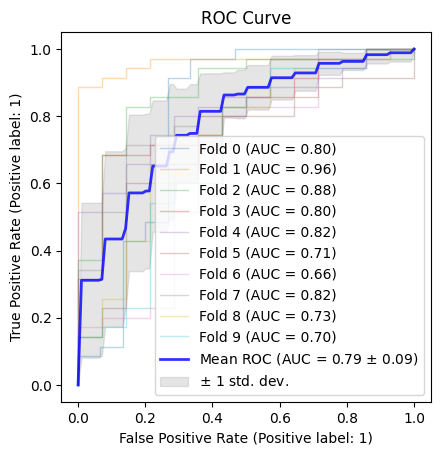

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='adaptive',max_iter=10) # Include parameter based on grid search output


#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)


conf_matrix_list_of_arrays = []
accuracy_scores=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   #counter=Counter(y_train)
   #print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   #print(counter)

   model.fit(X_train, y_train)

   y_pred = model.predict_proba(X_test)
   # keep probabilities for the positive outcome only
   probs = y_pred[:, 1]
   # define thresholds
   thresholds = arange(0, 1, 0.001)
   #thresholds = arange(0, 1, 0.1)
   # evaluate each threshold
   #scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
   scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
   # get best threshold
   ix = argmax(scores)
   print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))
   conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
   print(conf_matrix)
   conf_matrix_list_of_arrays .append(conf_matrix)
   acc_score=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
   #print('Accuracy=%.4f' %acc_score)
   accuracy_scores.append(acc_score)

   #print(classification_report(y_test, to_labels(probs, thresholds[ix],labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = RocCurveDisplay.from_estimator(model, X_test, y_test,name='Fold {}'.format(i),alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

#conf_matrix=np.add(conf_matrix_list_of_arrays,axis=0)
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(conf_matrix)
print(mean_of_conf_matrix_arrays)
mean_accuracy_scores=np.mean(accuracy_scores, axis=0)
#print(mean_accuracy_scores)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))

#print(conf_mat)

# Stratified K-Fold cross-validation with SMOTE oversampling

Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.152, AUC-Score=0.80476
[[10  5]
 [ 2 33]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.487, AUC-Score=0.92857
[[14  0]
 [ 5 30]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.198, AUC-Score=0.84286
[[12  2]
 [ 6 29]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.640, AUC-Score=0.79286
[[13  1]
 [12 23]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.548, AUC-Score=0.83571
[[13  1]
 [ 9 26]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.609, AUC-Score=0.70000
[[10  4]
 [11 24]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.227, AUC-Score=0.68571
[[ 6  8]
 [ 2 33]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.499, AUC-Score=0.72143
[[ 9  5]
 [ 7 28]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.687, AUC-Score=0.78571
[[12  2]
 [10 25]]
Class distribution after SMOTE: Counter({0: 315, 1: 315})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.485, AUC-Score=0.65000
[[ 5  9]
 [ 2 33]]
Mean Confusion Matrix:
 [[10.4  3.7]
 [ 6.6 28.4]]
Mean Accuracy: 0.790 (0.058)


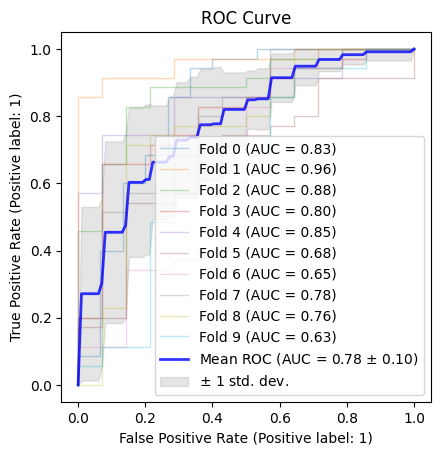

In [ ]:
from numpy import mean, std, arange, argmax
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score, classification_report, RocCurveDisplay, auc
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define helper function for converting probabilities to labels based on a threshold
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# Initialize the model (with parameters from grid search if available)
model = MLPClassifier(hidden_layer_sizes=(512,), activation='tanh', learning_rate='adaptive', max_iter=10)

# Initialize Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=10)

# Prepare to store results across folds
conf_matrix_list_of_arrays = []
accuracy_scores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Perform cross-validation
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply SMOTE oversampling to balance the training data
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    print("Class distribution after SMOTE:", Counter(y_train))

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_pred = model.predict_proba(X_test)
    probs = y_pred[:, 1]  # Keep probabilities for the positive class

    # Define a range of thresholds and evaluate each threshold
    thresholds = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]

    # Select the best threshold based on AUC score
    ix = argmax(scores)
    print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))

    # Compute and store confusion matrix and accuracy for best threshold
    conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
    print(conf_matrix)
    conf_matrix_list_of_arrays.append(conf_matrix)

    acc_score = accuracy_score(y_test, to_labels(probs, thresholds[ix]))
    accuracy_scores.append(acc_score)

    # Generate ROC curve for the current fold
    viz = RocCurveDisplay.from_estimator(model, X_test, y_test, name=f'Fold {i}', alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# Plot the mean ROC curve with standard deviation area
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# Fill area with +/- standard deviation
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# Set plot limits and labels, and save the figure
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve")
ax.legend(loc="lower right")
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

# Calculate and print the mean confusion matrix and accuracy scores
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print("Mean Confusion Matrix:\n", mean_of_conf_matrix_arrays)
print('Mean Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))


# Stratified K-Fold cross-validation with under-sampling

Class distribution after under-sampling: Counter({0: 126, 1: 126})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.292, AUC-Score=0.80952
[[11  4]
 [ 4 31]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.408, AUC-Score=0.89286
[[13  1]
 [ 5 30]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.240, AUC-Score=0.83571
[[11  3]
 [ 4 31]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.122, AUC-Score=0.74286
[[ 8  6]
 [ 3 32]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.332, AUC-Score=0.74286
[[10  4]
 [ 8 27]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.191, AUC-Score=0.67143
[[ 6  8]
 [ 3 32]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.776, AUC-Score=0.67143
[[12  2]
 [18 17]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.702, AUC-Score=0.68571
[[12  2]
 [17 18]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.212, AUC-Score=0.69286
[[ 7  7]
 [ 4 31]]
Class distribution after under-sampling: Counter({0: 127, 1: 127})


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Threshold=0.517, AUC-Score=0.65000
[[ 9  5]
 [12 23]]
Mean Confusion Matrix:
 [[ 9.9  4.2]
 [ 7.8 27.2]]
Mean Accuracy: 0.755 (0.097)


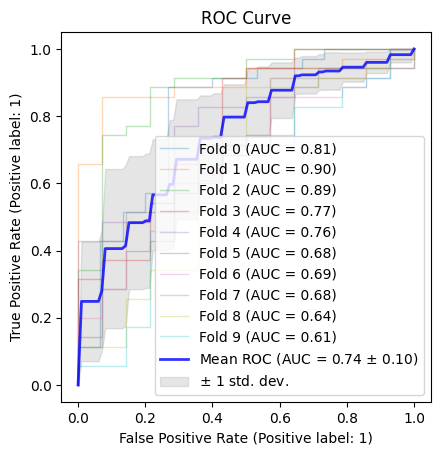

In [ ]:
from numpy import mean, std, arange, argmax
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score, classification_report, RocCurveDisplay, auc
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define helper function for converting probabilities to labels based on a threshold
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# Initialize the model (with parameters from grid search if available)
model = MLPClassifier(hidden_layer_sizes=(512,), activation='tanh', learning_rate='adaptive', max_iter=10)

# Initialize Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=10)

# Prepare to store results across folds
conf_matrix_list_of_arrays = []
accuracy_scores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Perform cross-validation
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply under-sampling to balance the training data
    undersample = RandomUnderSampler()
    X_train, y_train = undersample.fit_resample(X_train, y_train)
    print("Class distribution after under-sampling:", Counter(y_train))

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_pred = model.predict_proba(X_test)
    probs = y_pred[:, 1]  # Keep probabilities for the positive class

    # Define a range of thresholds and evaluate each threshold
    thresholds = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]

    # Select the best threshold based on AUC score
    ix = argmax(scores)
    print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))

    # Compute and store confusion matrix and accuracy for best threshold
    conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
    print(conf_matrix)
    conf_matrix_list_of_arrays.append(conf_matrix)

    acc_score = accuracy_score(y_test, to_labels(probs, thresholds[ix]))
    accuracy_scores.append(acc_score)

    # Generate ROC curve for the current fold
    viz = RocCurveDisplay.from_estimator(model, X_test, y_test, name=f'Fold {i}', alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# Plot the mean ROC curve with standard deviation area
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# Fill area with +/- standard deviation
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# Set plot limits and labels, and save the figure
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve")
ax.legend(loc="lower right")
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

# Calculate and print the mean confusion matrix and accuracy scores
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print("Mean Confusion Matrix:\n", mean_of_conf_matrix_arrays)
print('Mean Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))
